THIAW Mouhamadou Lamine Bara

# Computer Problem Set 2.3
# Proﬁt and Loss of the Black-Scholes hedging


In [81]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

We have to simulate the given discrete path {$ \sigma_{t_i^n}$, i=0,...,n} which process is : $d\sigma_t = \lambda(c-\sigma_t)\,dt + \gamma\, dW_t{(2)}$. \
The solution of the process is : $\sigma_t = c + (\sigma_0-c)e^{-\lambda t} + \gamma\int_0^t e^{-\lambda(t-s)}\,dW_s^{(2)}.$

In [82]:
N=1000
sigma_0=0.5
lmda=3
gamma=0.5
T=1
c=0.5

M=1

In [83]:
def simulate_Ornstein_Uhlenbeck(sigma_0,lmda,gamma,T,c,n,M):
    dT=T/n
    dWt= np.zeros((n,M))
    dWt[1:] = np.random.randn(n-1, M)*np.sqrt(dT)
    interval=np.linspace(0,T,n)
    integral= np.exp(-lmda*interval)*np.cumsum(np.exp(lmda*interval)*dWt, axis=0)
    

    sigma_t = c + (sigma_0 - c) * np.exp(-lmda * interval) + gamma * np.transpose(integral)

    return sigma_t

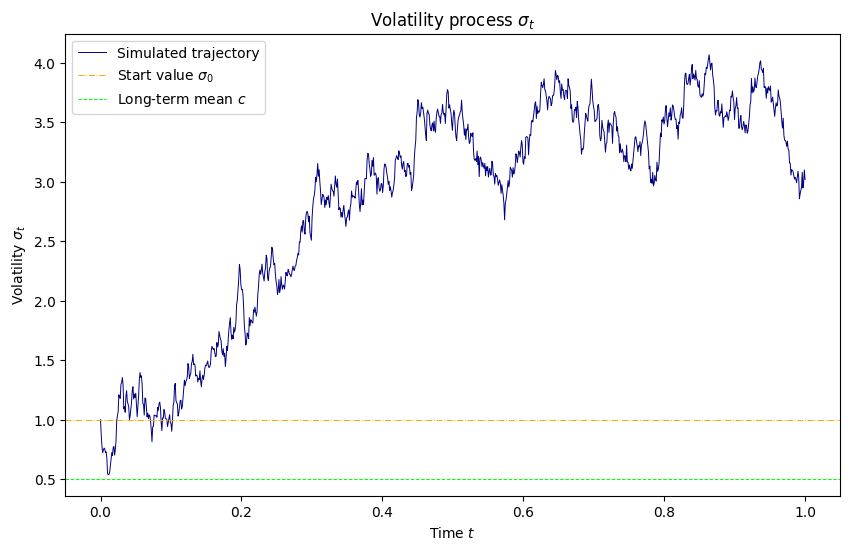

In [84]:
n = 1000
sigma_0 = 1.0
times = np.linspace(0, T, n, endpoint=True)
sig_trajectory = simulate_Ornstein_Uhlenbeck(sigma_0, c, lmda, gamma, T, n, M=1)
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(times, sig_trajectory[0], linewidth=0.7, c='navy', label='Simulated trajectory')  
plt.xlabel('Time $t$')
plt.ylabel('Volatility $\sigma_t$')
plt.axhline(sigma_0, times.min(), times.max(), c='orange', linewidth=0.7, linestyle='-.', label="Start value $\sigma_0$")  
plt.axhline(c, times.min(), times.max(), c='lime', linewidth=0.7, linestyle='--', label="Long-term mean $c$") 
plt.legend()
plt.title('Volatility process $\sigma_t$')

# Show the plot
plt.show()

# 2.Risky asset price

In [85]:
def risky_asset_price(S0, sigma_0, lmda, c, gamma, T, n, N, sigma_traj=None):

    if sigma_traj is None:
        sigma_traj = simulate_Ornstein_Uhlenbeck(sigma_0, c, lmda, gamma, T, n-1, M=1000).transpose()
    else:
        N = sigma_traj.shape[0]
        sigma_traj = sigma_traj[:,:-1].transpose()
    dt = T/n
    times = np.linspace(0, T, n, endpoint=True)
    volatility_integral = np.zeros((n, N))
    volatility_integral[1:] = np.cumsum(np.power(sigma_traj, 2)*dt, axis=0)
    dwt = np.sqrt(dt)*np.random.randn(n-1, N)
    stoch_integral = np.zeros((n, N))
    stoch_integral[1:] = np.cumsum(sigma_traj*dwt, axis=0)
    result= S0*np.exp(-0.5*volatility_integral + stoch_integral).transpose()
    return result

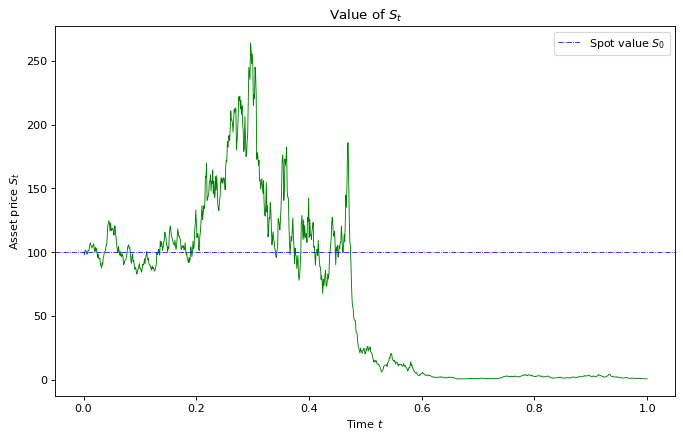

In [86]:
n = 1000
So=100
time = np.linspace(0, T, n, endpoint=True)
asset_trajectory = risky_asset_price(So, sigma_0, c, lmda, gamma, T, n,N, sigma_traj=sig_trajectory)
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(time, asset_trajectory[0], linewidth=0.8, c='green')  # Change 'darkred' to 'green' or any other color
plt.xlabel('Time $t$')
plt.ylabel('Asset price $S_t$')
plt.title('Value of $S_t$')
plt.axhline(So, time.min(), time.max(), c='blue', linewidth=0.7, linestyle='-.', label="Spot value $S_0$")
plt.legend()
plt.show()


3.

We are gonna compute the greek gamma

In [87]:
def d_plus(s,k,v):
    return np.log(s/k)/np.sqrt(v) + np.sqrt(v)/2

def compute_greek_gamma(t, S0, sigm, K, r, T):

    dp = d_plus(S0, K*np.exp(-r*T) , sigm**2*T)
    return stats.norm.pdf(dp)/(S0*sigm*np.sqrt(T - t))

In [88]:
def profit_and_loss(sigm, r, K, S0, sig0, c, lmda, gamma, T, n, N):

    dt = T/n
    
    sigma_traj = simulate_Ornstein_Uhlenbeck(sig0,lmda, gamma, T,c, n, M=1000)
    
    
    asset_traj = risky_asset_price(S0, sig0,lmda,c, gamma, T, n,N=1000, sigma_traj=sigma_traj)
    asset_traj = asset_traj.T[:-1]
    sigma_traj = sigma_traj.T[:-1]
    asset_traj = asset_traj[:,:,None]
    sigma_traj = sigma_traj[:,:,None]
    times = np.linspace(0, T, n)[:-1]
    greek_gamma = compute_greek_gamma(times[:,None,None], asset_traj, sigm, K[None,None,:], r, T)
    function_ = np.exp(r*(T - times[:,None,None]))*(sigm**2 - sigma_traj**2)*(asset_traj**2)*greek_gamma
    integral_ =  np.sum(function_*dt, axis=0)
    return sigma_traj, 0.5*integral_.T

In [89]:
S0 = 100
T = 1
sig0 = 0.4
lmda = 2.0
c = 0.4
gamma = 0.3
sigm = sig0
r = 0.02
K_range = np.array([90, 95, 100, 105, 110])  # Add the strike prices you want to test

n_range = range(10,100,10)
n = 1001
N = 1000


In [90]:
vol, profit_sample = profit_and_loss(sigm, r, K_range, S0, sig0, c, lmda, gamma, T, n, N)

ValueError: operands could not be broadcast together with shapes (1001,) (1001,1000) 

In [ ]:

samples_matrix = np.empty((6, len(K_range), N))
sample_vols = []
for i,n in enumerate(n_range):

    vol, pnl_sample = profit_and_loss(sigm, r, K_range, S0, sig0, c, lmda, gamma, T, n, N)
    samples_matrix[i, :, :] = pnl_sample



ValueError: operands could not be broadcast together with shapes (10,) (10,1000) 